In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
import pickle

**Importing Dataset**

In [2]:
df=pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
df_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


**EDA (Univariate, Multivariate, kde , pearson corelation)**

In [5]:
pd.set_option("display.max_columns", 2000)                              # To show the all columns
pd.set_option("display.max_rows", 85)

In [6]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.select_dtypes(include=['int64', 'float64']).columns                    #  selecting all numerical columns

In [ ]:
df.select_dtypes(exclude=['int64', 'float64']).columns                    # Selecting all catagorical columns

In [ ]:
df = df.set_index("Id")                         # Set index as Id column

In [ ]:
df.shape

(1460, 80)

In [ ]:
df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [10]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)  # Selecting all columns having null values with number of null values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

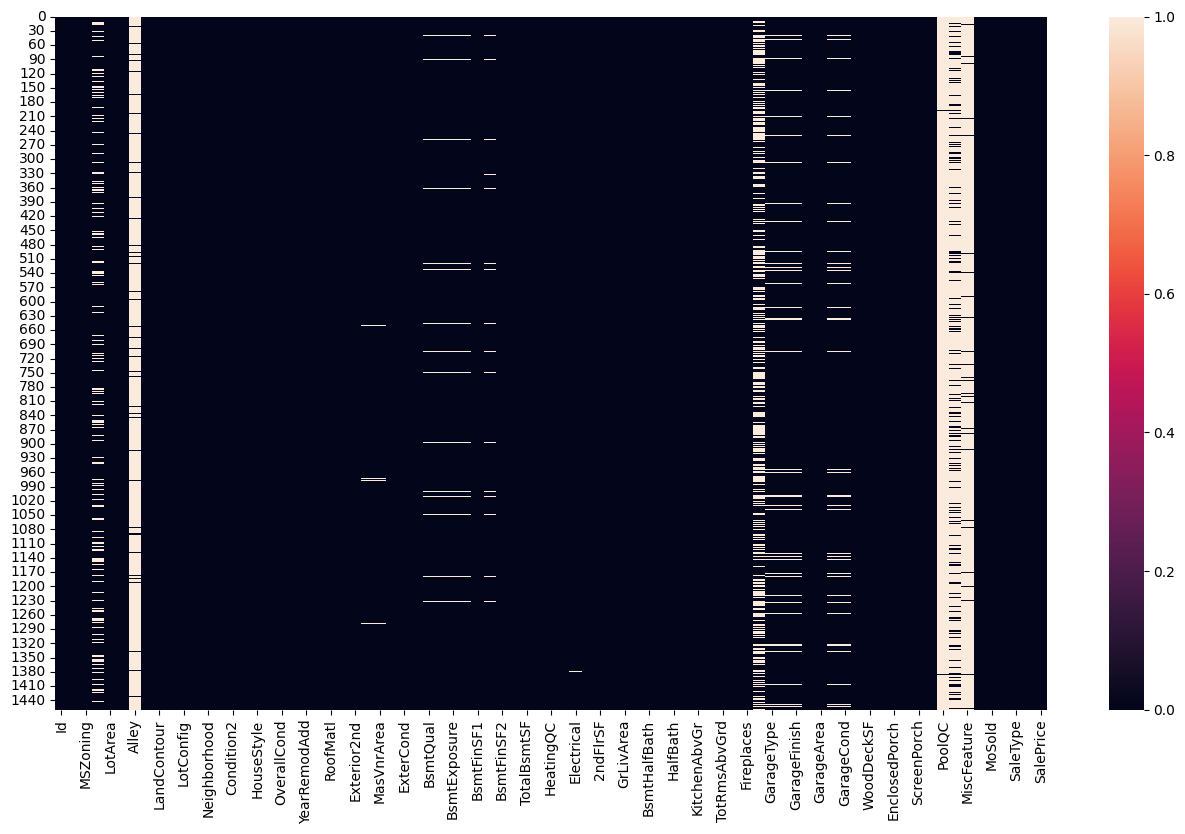

In [11]:
plt.figure(figsize=(16,9))   ;                    # plotting the null values using heatmap
sns.heatmap(df.isnull());

In [ ]:
# PoolQC , MiscFeature , Alley , Fence and FireplaceQu feature has maximum null values out of 1460 values.

In [12]:
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence',"FireplaceQu"],axis=1,inplace=True)

In [13]:
df.shape

(1460, 76)

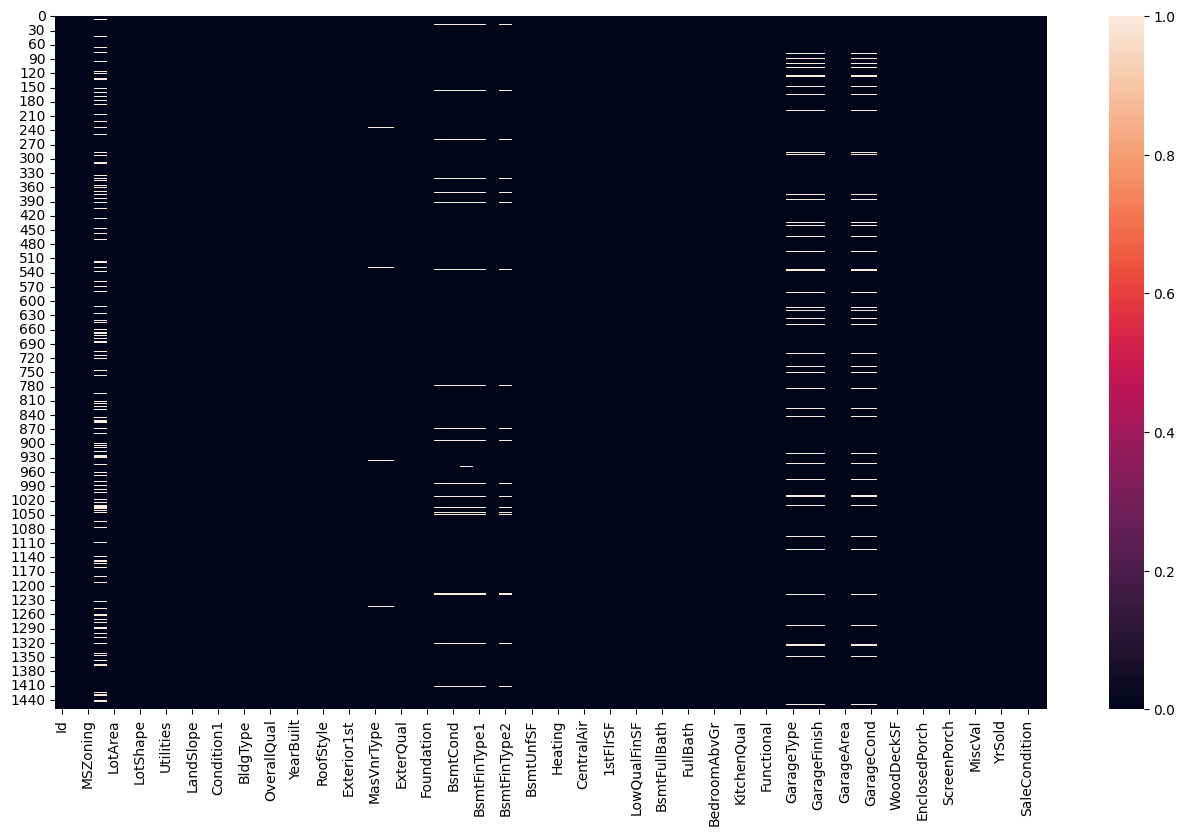

In [14]:
plt.figure(figsize=(16,9))  ;                     # plotting the null values using heatmap after removing columns with max null values
sns.heatmap(df.isnull());

<ipython-input-15-0eea819992a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "cividis", annot=True, linewidth=2)  ;    # plotting correlation matrix


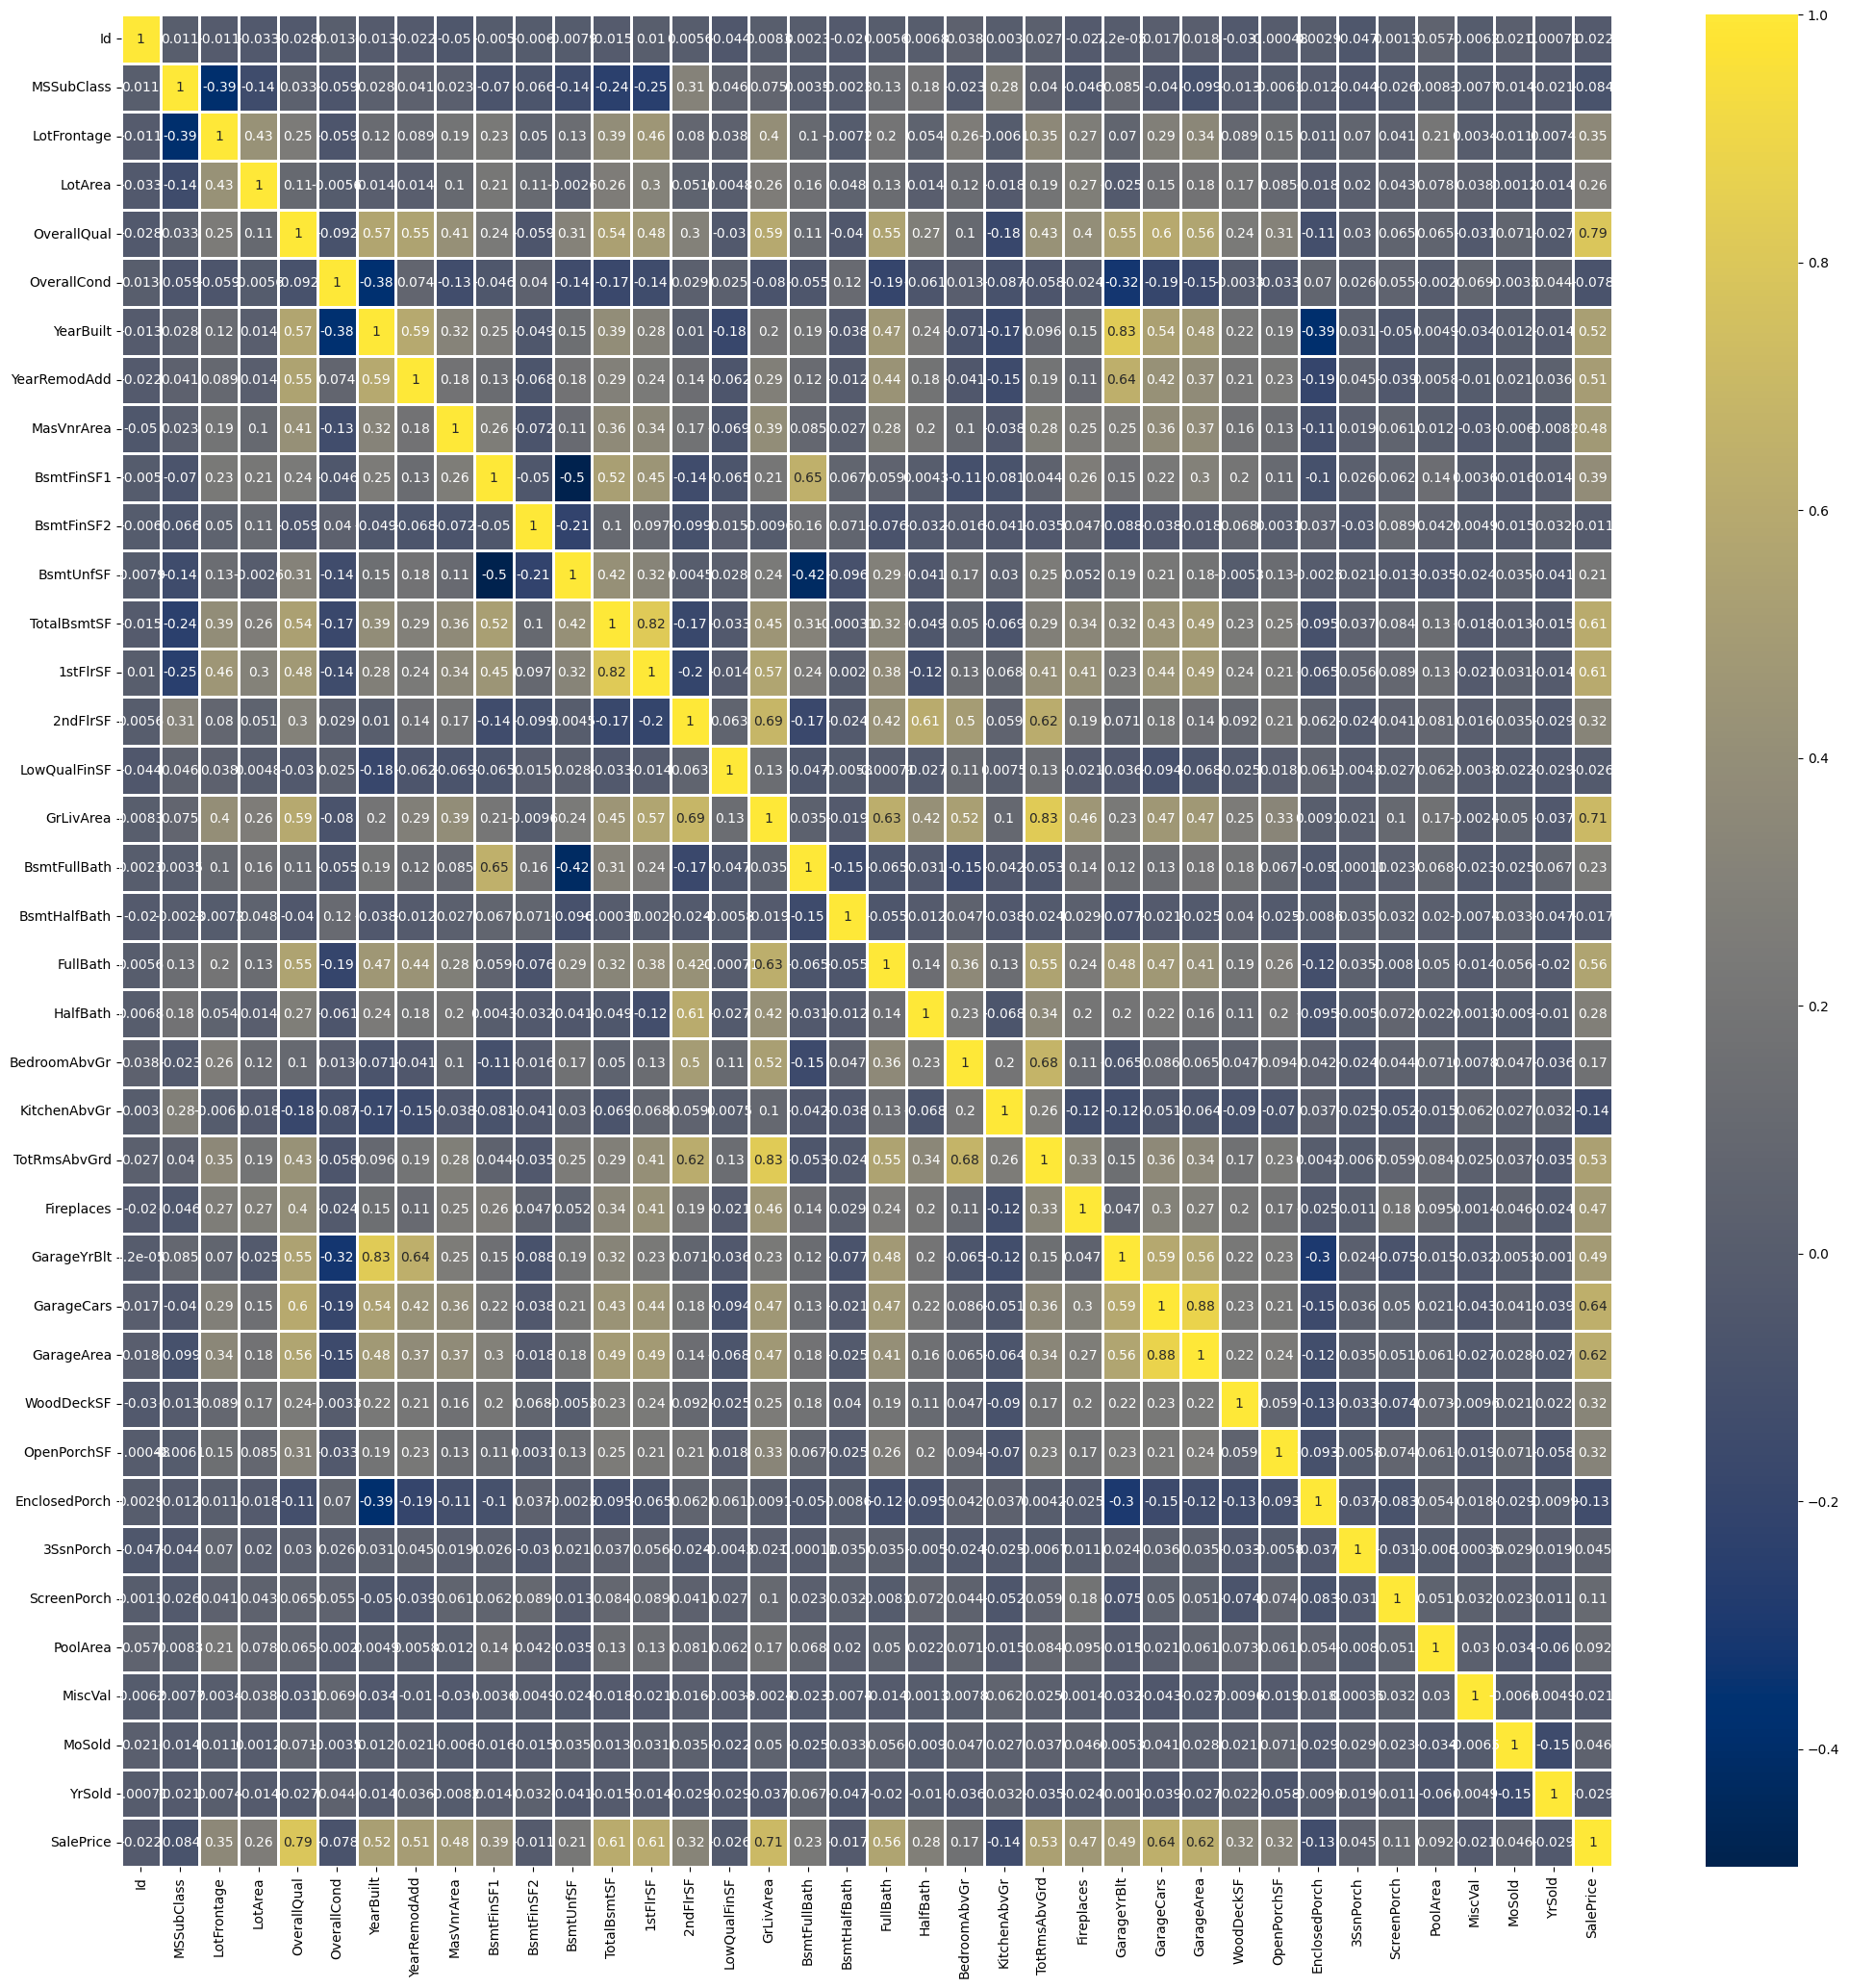

In [15]:
plt.figure(figsize=(25,25));
sns.heatmap(df.corr(), cmap = "cividis", annot=True, linewidth=2)  ;    # plotting correlation matrix

In [16]:
strng_corr = df.corr()
strng_corr_features = strng_corr.index[abs(strng_corr["SalePrice"]) >= 0.5]   # Fetching the features which has max strong correlaton with target feature
print(strng_corr_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


<ipython-input-16-b55c876d1d4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  strng_corr = df.corr()


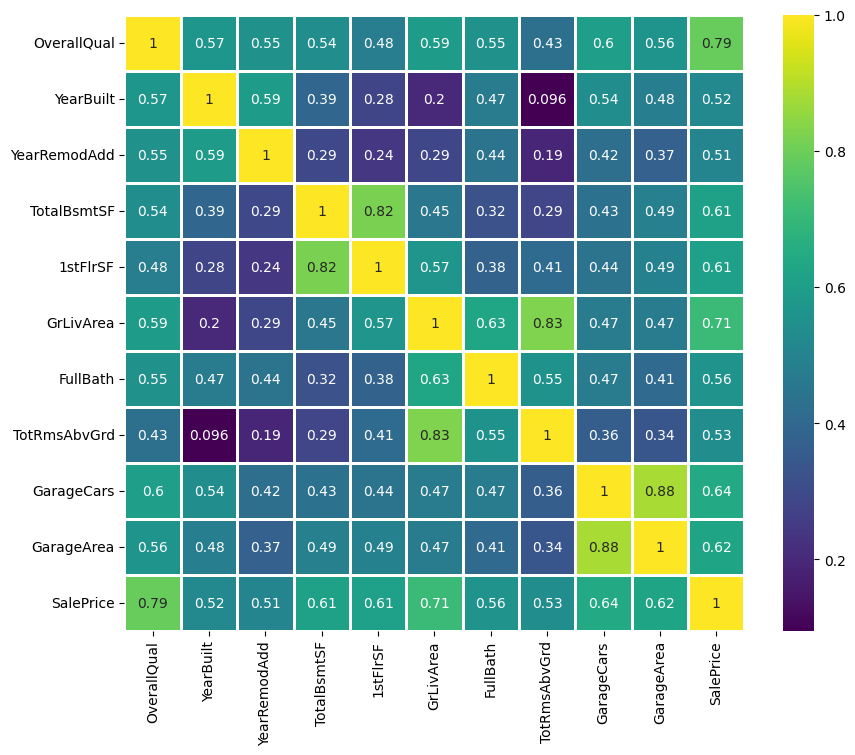

In [17]:
plt.figure(figsize=(10,8));
sns.heatmap(df[strng_corr_features].corr(), cmap = "viridis", annot=True, linewidth=2)  ;   # plotting with help of correlation matrix

In [ ]:
# OverallQual has the maximum strong relation with Target feature SalePrice i.e- 0.79

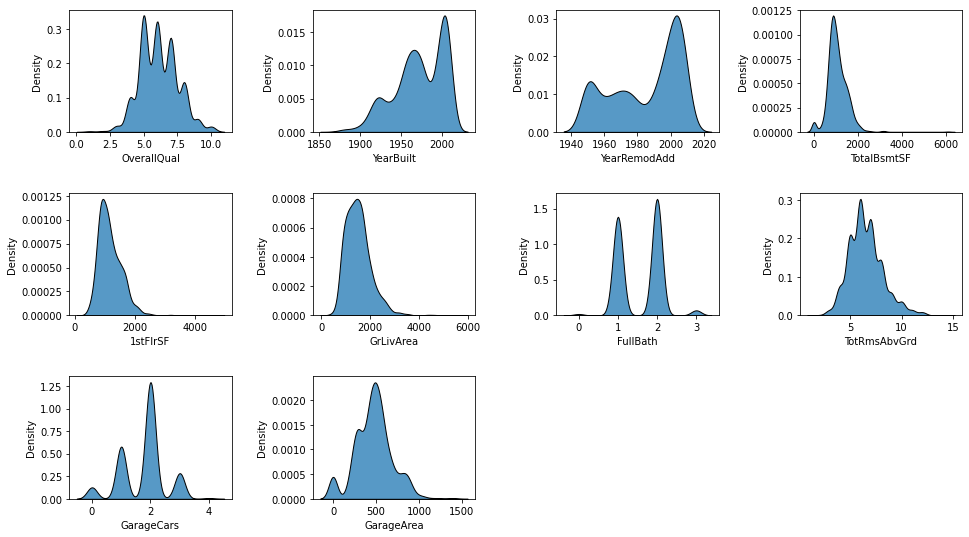

In [ ]:
plt.figure(figsize=(16,9));
for i in range(len(strng_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1);
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5);
        sns.kdeplot(data=df, x = strng_corr_features[i],multiple='stack');    # univariate analysis

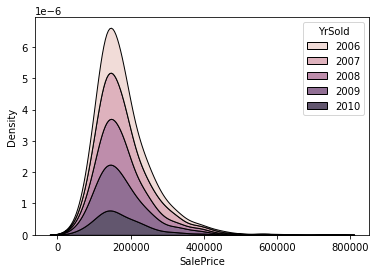

In [ ]:
sns.kdeplot(data=df,x="SalePrice",hue="YrSold",multiple="stack")

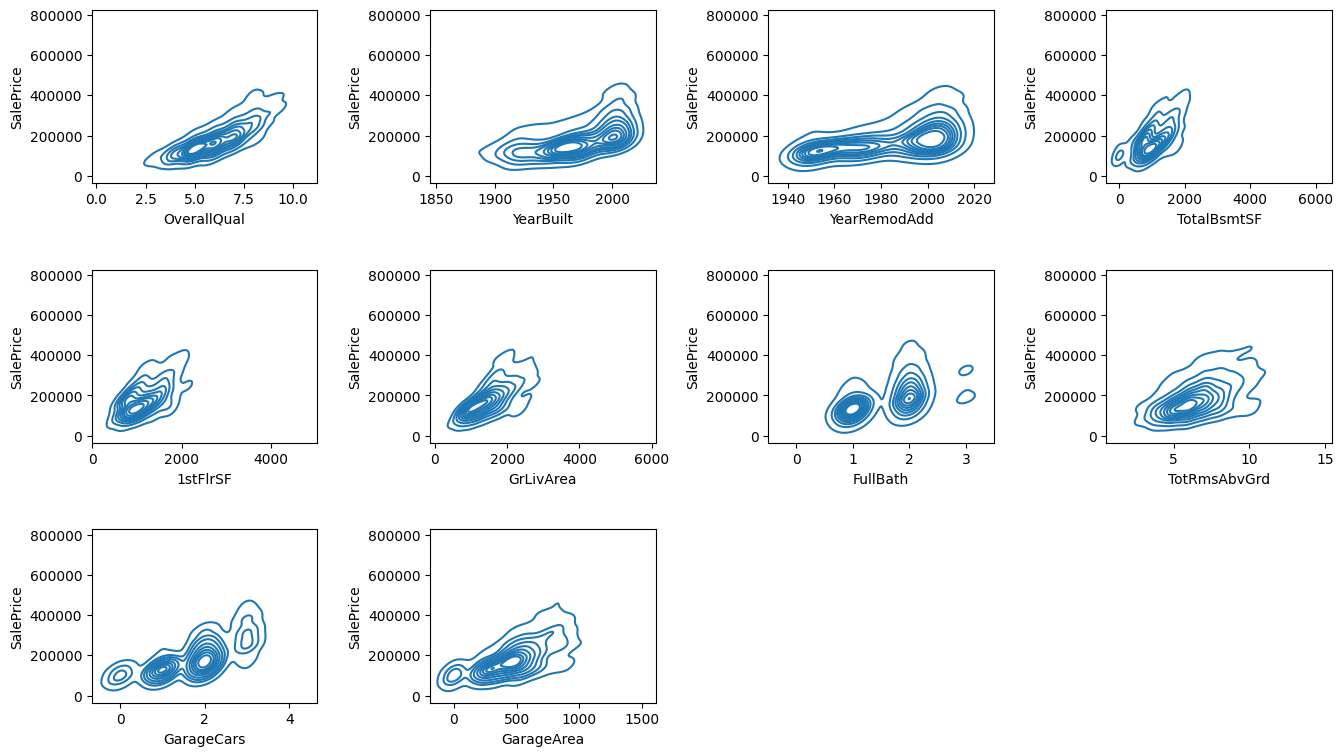

In [18]:
plt.figure(figsize=(16,9));
for i in range(len(strng_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1);
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5);
        sns.kdeplot(data=df, x = strng_corr_features[i], y = 'SalePrice');

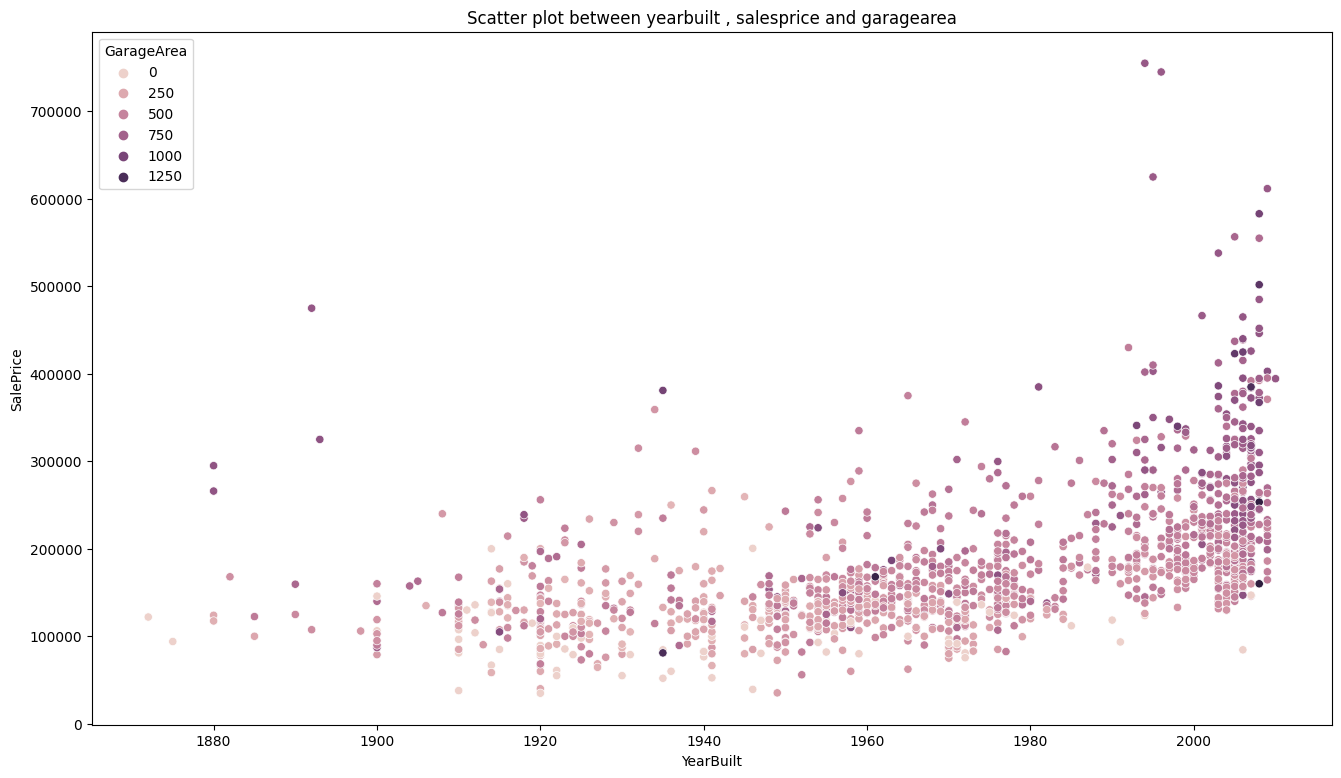

In [19]:
plt.figure(figsize=[16,9]);
sns.scatterplot(x=df['YearBuilt'],y=df['SalePrice'],hue=df['GarageArea']);
plt.title("Scatter plot between yearbuilt , salesprice and garagearea");

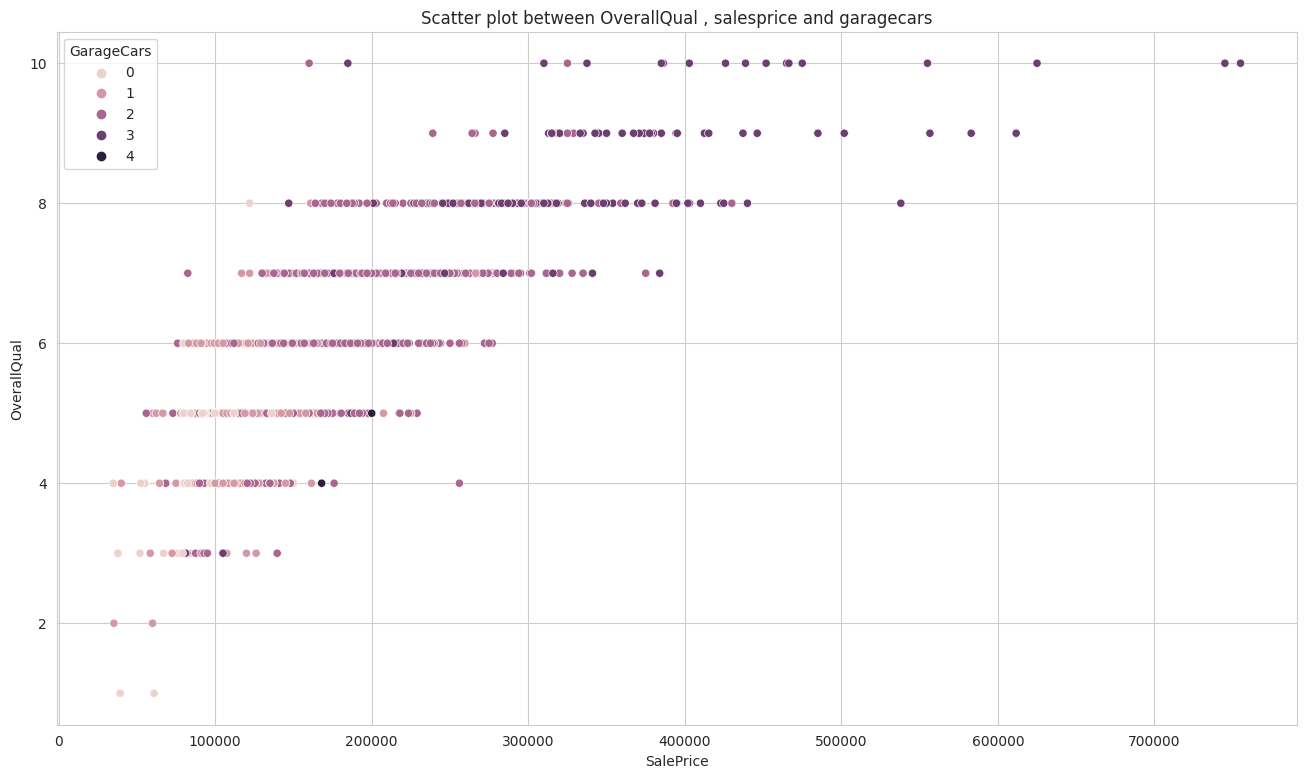

In [20]:
plt.figure(figsize=[16,9]);
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.scatterplot(y=df['OverallQual'],x=df['SalePrice'],hue=df['GarageCars']);
plt.title("Scatter plot between OverallQual , salesprice and garagecars");

**Data Preprocessing (Imputation, Creating 2 new features)**

In [ ]:
# imputation

In [21]:
null_ft=df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)
null_ft

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [22]:
LotFrontage_median =df['LotFrontage'].median()
df['LotFrontage'].fillna(LotFrontage_median,inplace=True)

In [23]:
GarageYrBlt_mean =df['GarageYrBlt'].mean()
df['GarageYrBlt'].fillna(GarageYrBlt_mean,inplace=True)

In [24]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [25]:
df['BsmtCond'].fillna('TA',inplace=True)

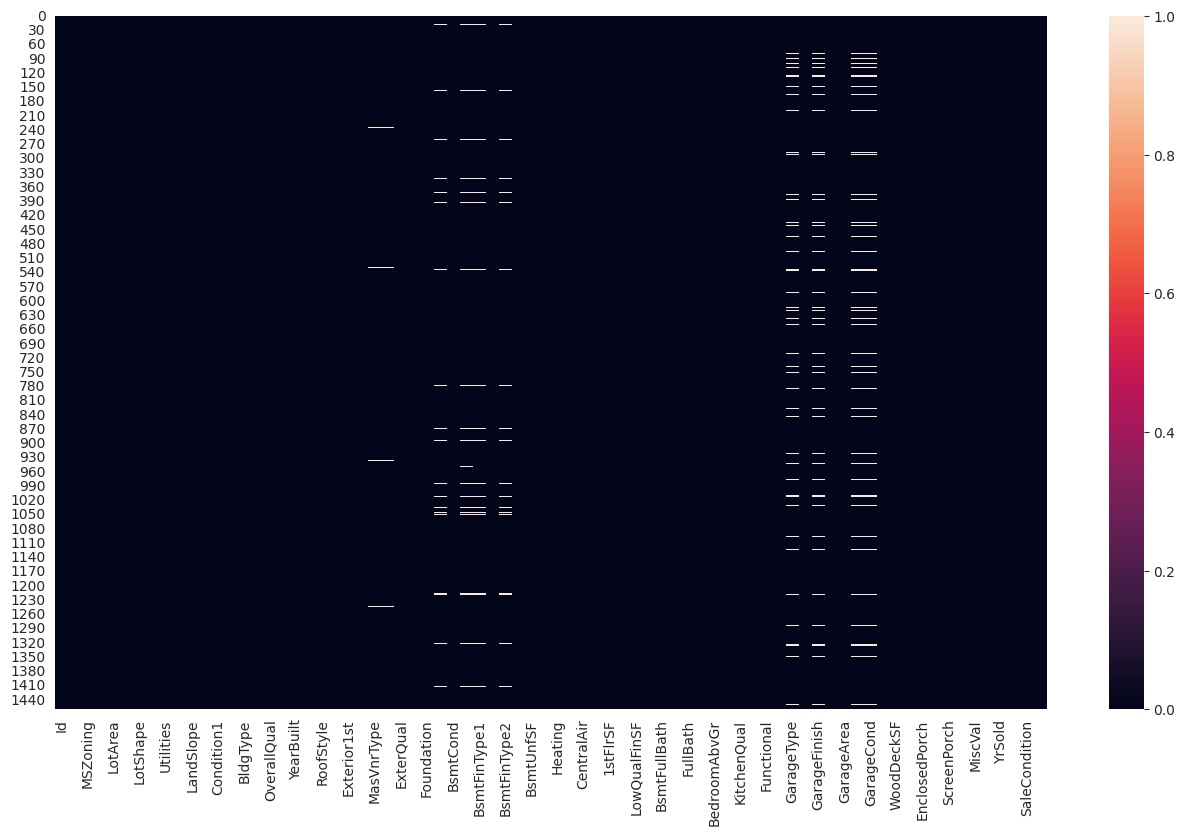

In [26]:
plt.figure(figsize=(16,9))  ;
sns.heatmap(df.isnull());

In [ ]:
# 1st New feature

In [ ]:
df['Total_Bath']=df['BsmtFullBath']+df['BsmtHalfBath']+df['FullBath']+df['HalfBath']

In [ ]:
# 2nd New feature

In [ ]:
df['Total_qual']=df['OverallQual']+df['OverallCond']

In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [ ]:
# Dropping unnecessary columns

In [30]:
df.drop(columns=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

In [31]:
df.shape

(1460, 72)

In [32]:
strng_corr = df.corr()
strng_corr_features = strng_corr.index[abs(strng_corr["SalePrice"]) >= 0.5]   # Fetching the features which has max strong correlaton with target feature
print(strng_corr_features)

Index(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'Total_Bath',
       'Total_qual'],
      dtype='object')


<ipython-input-32-b55c876d1d4f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  strng_corr = df.corr()


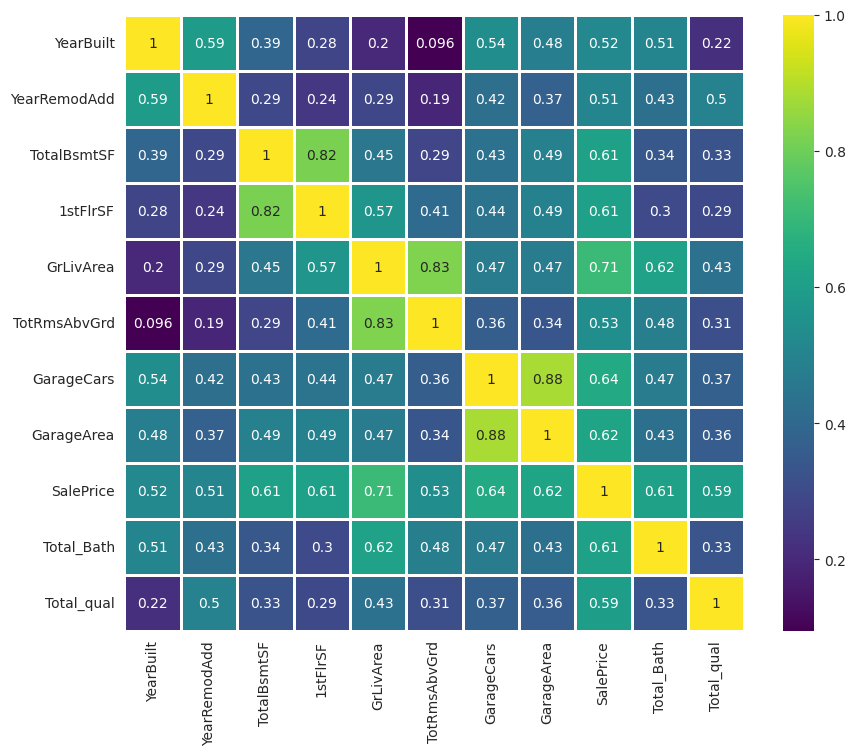

In [33]:
plt.figure(figsize=(10,8));
sns.heatmap(df[strng_corr_features].corr(), cmap = "viridis", annot=True, linewidth=2);   # plotting new features in correlation matrix

In [34]:
# two new features Total_Bath and Total_qual has postive correlation of 0.61 and 0.59 with the target feature i.e Saleprice.

In [ ]:
# Creating new dataframe and segregeting dependent and independent or target variable

In [35]:
df_X = df[['Total_qual','YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'Total_Bath'
       ]].copy()

In [36]:
df_X.head(2)

,Total_qual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,Total_Bath
0,12,2003,2003,856,856,1710,8,2,548,4
1,14,1976,1976,1262,1262,1262,6,2,460,3


In [37]:
df_X.shape

(1460, 10)

In [38]:
df_Y = df['SalePrice'].copy()

In [ ]:
df_Y.head()

In [39]:
df_Y.shape

(1460,)

**Spliting the data into train and test**

In [40]:
x_train , x_test , y_train , y_test = train_test_split(df_X,df_Y,test_size=0.20,random_state= 21)

In [41]:
x_train.shape, x_test.shape,

((1168, 10), (292, 10))

In [42]:
y_train.shape, y_test.shape

((1168,), (292,))

**Model Build 1(Linear regression)**

In [43]:
from sklearn.linear_model import LinearRegression
model1 =LinearRegression()
model1.fit(x_train , y_train);

**Model Build 2 ( Random Forest Regression )**

In [44]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators = 1000, random_state=42)
model2.fit(x_train , y_train);

**Cross Validation**

In [45]:
from sklearn.model_selection import cross_val_score
crvs_lr = cross_val_score(model1,df_X,df_Y,cv=20)
crvs_lr                                                                           # Cross validation score of Linear Regression model(Max-86.09 %)

array([ 0.85314764,  0.70949011,  0.80078624,  0.85237319,  0.86099312,
        0.81705302,  0.82156499,  0.53337657,  0.83917189,  0.75644581,
        0.81701935,  0.77089224,  0.74790228,  0.81668931,  0.78165925,
        0.82463852,  0.74019369, -0.06570963,  0.83183341,  0.81134917])

In [46]:
crvs_rf = cross_val_score(model2,df_X,df_Y,cv=20)
crvs_rf                                                                         # Cross validation score of Random Forest Regression model(Max-91.45 %)

array([0.88832898, 0.72254988, 0.8683593 , 0.8645379 , 0.83245552,
       0.88959144, 0.86174441, 0.31940313, 0.9019284 , 0.85508745,
       0.8981138 , 0.88169774, 0.89221479, 0.91299963, 0.90013388,
       0.91459022, 0.80855505, 0.75760005, 0.86535933, 0.87557999])

**Model Predict**

In [47]:
predict1 = model1.predict(x_test)                                               # Linear Regression model predict

In [48]:
lr_scr=r2_score(y_test,predict1)                                                # Score of Linear Regression Model
lr_scr

0.7513361310853501

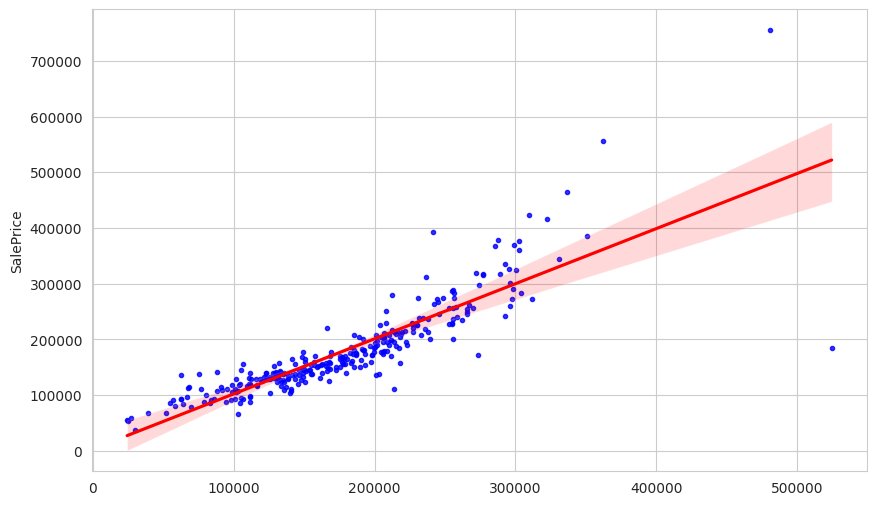

In [49]:
plt.figure(figsize=(10,6));
sns.regplot(x=predict1, y=y_test,marker=".",scatter_kws={"color": "blue"}, line_kws={"color": "red"});

In [50]:
predict2 = model2.predict(x_test)                                               # Random Forest Regression model predict

In [51]:
Rf_scr=r2_score(y_test,predict2)
Rf_scr                                                                           # Score of Random Forest Regression Model

0.7674787694284316

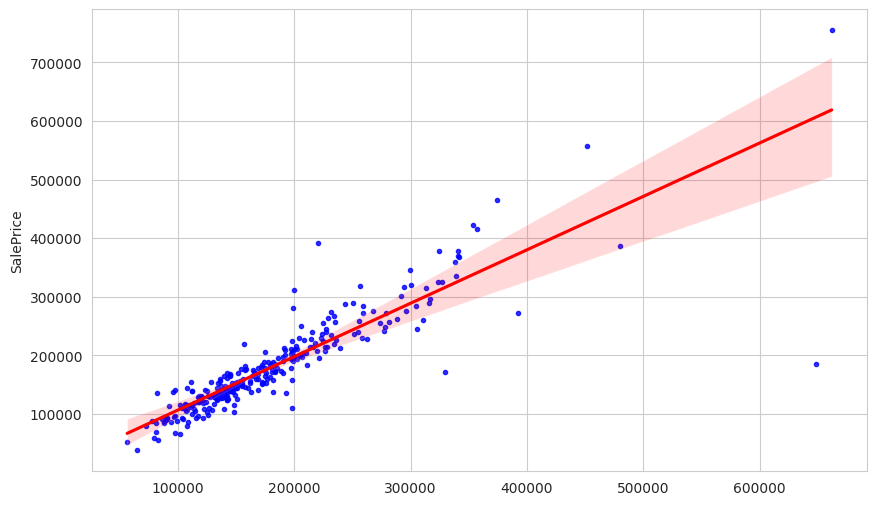

In [52]:
plt.figure(figsize=(10,6));
sns.regplot(x=predict2, y=y_test,marker=".",scatter_kws={"color": "blue"}, line_kws={"color": "red"});

**Score of Both model**

In [53]:
print('Linear model score- ',lr_scr)
print('Random Forest model score- ',Rf_scr)

Linear model score-  0.7513361310853501
Random Forest model score-  0.7674787694284316
